# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import datetime
import json
import requests
import scipy.stats as st

from api_keys import weather_api_key

from citipy import citipy







In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?"


## Generate Cities List

In [5]:
# Output File (CSV)
output_data_file = "Resources/cities.csv"


# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)



In [11]:

lat_lngs = []
cities = []

# Creating a set of random latititude and longitude combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each latitude, longitude 
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


596

In [9]:
city_name_list = []
cloudiness_list = []
country_list = []
date_list = []
humidity_list = []
lat_list = []
lng_list = []
max_temp_list = []
wind_speed_list = []
index_counter = 0
set_counter = 1

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [10]:
print("Beginning Data Retrieval ")
print("-----------------------------")

base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{base_url}appid={weather_api_key}&units={units}&q="


# For each city name in cities list, do below things...
for index, city in enumerate(cities, start = 1):
    try:
        response = requests.get(query_url + city).json()
        city_name_list.append(response["name"])
        cloudiness_list.append(response["clouds"]["all"])
        country_list.append(response["sys"]["country"])
        date_list.append(response["dt"])
        humidity_list.append(response["main"]["humidity"])
        lat_list.append(response["coord"]["lat"])
        lng_list.append(response["coord"]["lon"])
        max_temp_list.append(response['main']['temp_max'])
        wind_speed_list.append(response["wind"]["speed"])
        if index_counter > 49:
            index_counter = 0
            set_counter = set_counter + 1
    
        else:
            index_counter = index_counter + 1
            
        print(f"Processing Record {index_counter} of Set {set_counter} : {city}") 
  
    except(KeyError, IndexError):
        print("City not found. Skipping...")

print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

ord 50 of Set 2 : new norfolk
Processing Record 0 of Set 3 : port elizabeth
Processing Record 1 of Set 3 : margate
Processing Record 2 of Set 3 : poum
Processing Record 3 of Set 3 : mugango
Processing Record 4 of Set 3 : san patricio
Processing Record 5 of Set 3 : snezhnogorsk
Processing Record 6 of Set 3 : autun
Processing Record 7 of Set 3 : sibolga
Processing Record 8 of Set 3 : georgetown
Processing Record 9 of Set 3 : kruisfontein
Processing Record 10 of Set 3 : nikolskoye
Processing Record 11 of Set 3 : sulangan
Processing Record 12 of Set 3 : kavieng
Processing Record 13 of Set 3 : dali
Processing Record 14 of Set 3 : san andres
Processing Record 15 of Set 3 : geraldton
Processing Record 16 of Set 3 : tuktoyaktuk
Processing Record 17 of Set 3 : ogulin
Processing Record 18 of Set 3 : tessalit
Processing Record 19 of Set 3 : havre-saint-pierre
Processing Record 20 of Set 3 : bluff
City not found. Skipping...
Processing Record 21 of Set 3 : katsuura
Processing Record 22 of Set 3 : 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [13]:
city_df = pd.DataFrame(cities)
# city_df.to_csv("../Resources/city_weather.csv")
city_df.head()


,0
0,bluff
1,jamestown
2,arlit
3,krasnouralsk
4,bethel


In [14]:

weather_dict = pd.DataFrame({ 
                "City" : city_name_list,
                "Cloudiness" : cloudiness_list,
                "Country" : country_list,
                "Date" : date_list,
                "Humidity" : humidity_list,
                "Lat" : lat_list,
                "Lng" : lng_list,
                "Max Temp" : max_temp_list,
                "Wind Speed" : wind_speed_list
})

weather_dict.count()

City          561
Cloudiness    561
Country       561
Date          561
Humidity      561
Lat           561
Lng           561
Max Temp      561
Wind Speed    561
dtype: int64

In [15]:
weather_dict

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Krasnosel'kup,100,RU,1613822555,84,65.7000,82.4667,-28.50,5.77
1,Puerto Ayora,97,EC,1613822556,93,-0.7393,-90.3518,75.00,3.00
2,Samfya,100,ZM,1613822557,59,-11.3649,29.5565,81.01,1.21
3,Bagdarin,98,RU,1613822030,87,54.4333,113.6000,-9.08,1.90
4,Tuatapere,8,NZ,1613822558,89,-46.1333,167.6833,54.00,1.99
...,...,...,...,...,...,...,...,...,...
556,Arlit,80,NE,1613822965,13,18.7369,7.3853,79.32,1.74
557,Aranjuez,0,ES,1613822966,51,40.0311,-3.6025,66.99,9.22
558,Barashevo,87,RU,1613822966,93,54.5325,42.8792,6.46,4.85
559,Loandjili,98,CG,1613822967,64,-4.7561,11.8578,84.79,5.48


In [16]:

weather_dict.to_csv("Resources/cities.csv", index = False)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [17]:
#  Get the indices of cities that have humidity over 100%.


Int64Index([], dtype='int64')

In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

In [23]:
from scipy import stats

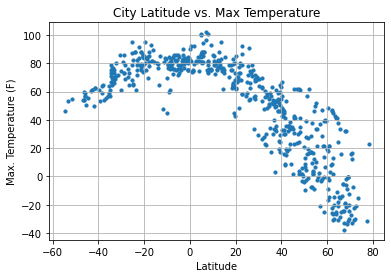

In [25]:

# Build a scatter plot for each data type
plt.scatter(weather_dict["Lat"], weather_dict["Max Temp"], marker="o", s=10)

# graph properties
plt.title("City Latitude vs. Max Temperature")
plt.ylabel("Max. Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("City Latitude_vs_Max Temperature.png")


# Show plot
plt.show()



## Latitude vs. Humidity Plot

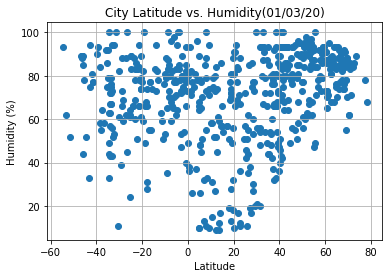

In [26]:

plt.scatter(weather_dict["Lat"], weather_dict["Humidity"], marker="o")

# list the graph properties
plt.title("City Latitude vs. Humidity(01/03/20)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("CityLatitude_vs_Humidity.png")

# Show plot
plt.show()

## Latitude vs. Cloudiness Plot

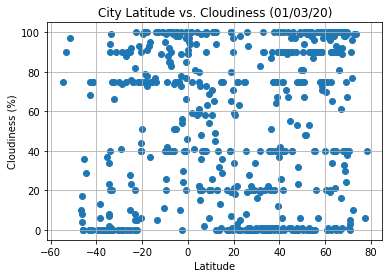

In [27]:
plt.scatter(weather_dict["Lat"], weather_dict["Cloudiness"], marker="o")

# graph properties
plt.title("City Latitude vs. Cloudiness (01/03/20)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("CityLatitude_vs_Cloudiness.png")

# Show plot
plt.show()

## Latitude vs. Wind Speed Plot

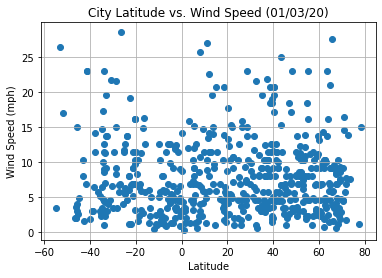

In [28]:
plt.scatter(weather_dict["Lat"], weather_dict["Wind Speed"], marker="o")

# graph properties
plt.title("City Latitude vs. Wind Speed (01/03/20)")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("CityLatitude_vs_WindSpeed.png")

# Show plot
plt.show()


## Linear Regression

In [30]:
def LinearRegressionplot(x_values, y_values):

# Perform a linear regression on Max Temp vs. latitude
    (slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
# Get regression values
    regress_values = x_values * slope + intercept
# Create line equation string
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
# Create Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-" )

# Label plot and annotate the line equation
    plt.xlabel('Latitude')
    plt.ylabel(str(y_values.name))
    plt.annotate(line_eq,(0,0), fontsize=15,color="red")

# Print r square value
    print(f"The r-squared is: {rvalue}")

# Show plot
plt.show()

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [35]:

# Create Northern and Southern Hemisphere DataFrames
Northern_Hemisphere = weather_dict.loc[weather_dict['Lat'] > 0] 
Sorthern_Hemisphere = weather_dict.loc[weather_dict['Lat'] < 0]

The r-squared is: -0.8746263977972322


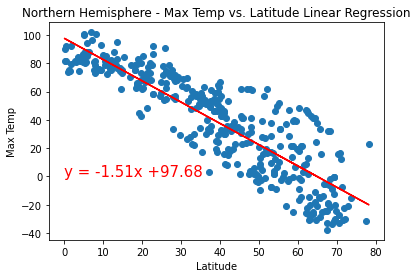

In [37]:
x_values = Northern_Hemisphere["Lat"]
y_values = Northern_Hemisphere["Max Temp"]
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")
LinearRegressionplot(x_values, y_values)
plt.savefig("Northern Hemisphere - Max Temp vs. Latitude Linear Regression.png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.6297456279690993


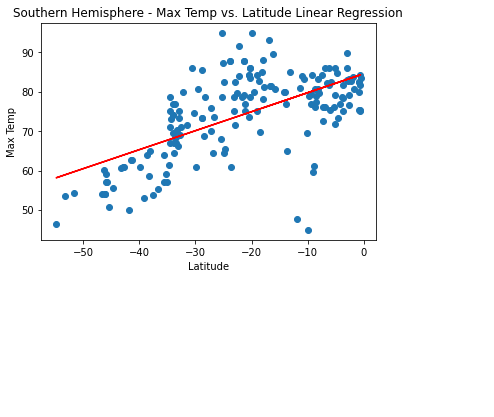

In [38]:

x_values = Sorthern_Hemisphere["Lat"]
y_values = Sorthern_Hemisphere["Max Temp"]
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")
LinearRegressionplot(x_values, y_values)
plt.savefig("southern Hemisphere - Max Temp vs. Latitude Linear Regression.png")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.45698834497256835


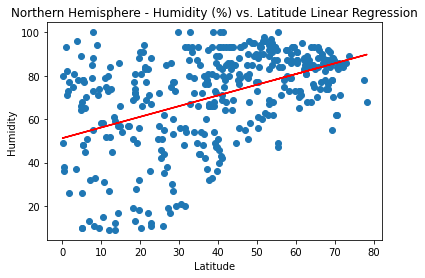

In [39]:
x_values = Northern_Hemisphere["Lat"]
y_values = Northern_Hemisphere["Humidity"]
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
LinearRegressionplot(x_values, y_values)
plt.savefig("Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png")


####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.08261721283290385


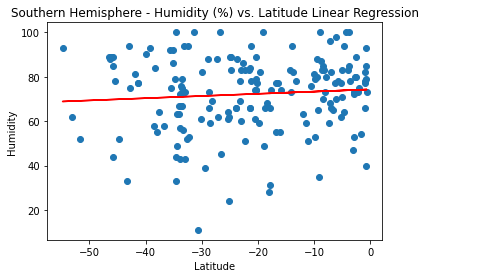

In [40]:

x_values = Sorthern_Hemisphere["Lat"]
y_values = Sorthern_Hemisphere["Humidity"]
plt.title("Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
LinearRegressionplot(x_values, y_values)
plt.savefig("Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.15152599349825


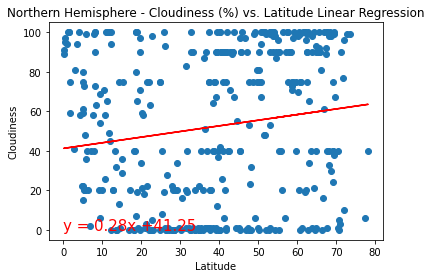

In [41]:

x_values = Northern_Hemisphere["Lat"]
y_values = Northern_Hemisphere["Cloudiness"]
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
LinearRegressionplot(x_values, y_values)
plt.savefig("Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png")


####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.44242469932229284


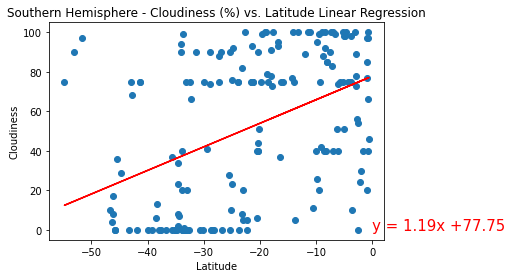

In [42]:

x_values = Sorthern_Hemisphere["Lat"]
y_values = Sorthern_Hemisphere["Cloudiness"]
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
LinearRegressionplot(x_values, y_values)
plt.savefig("Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png")


####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.023162645274857577


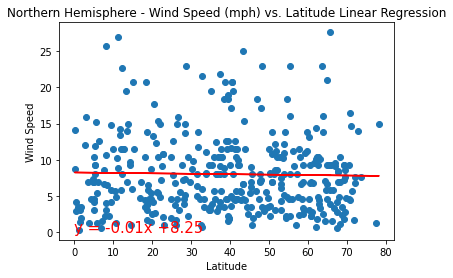

In [43]:
x_values = Northern_Hemisphere["Lat"]
y_values = Northern_Hemisphere["Wind Speed"]
plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
LinearRegressionplot(x_values, y_values)
plt.savefig("Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression.png")



####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.23202993524601812


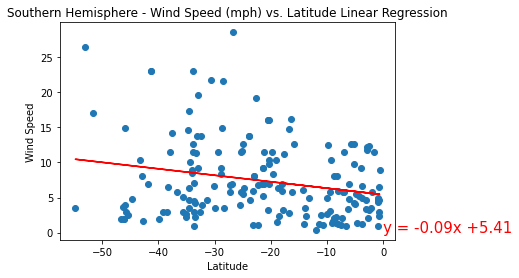

In [44]:
x_values = Sorthern_Hemisphere["Lat"]
y_values = Sorthern_Hemisphere["Wind Speed"]
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
LinearRegressionplot(x_values, y_values)
plt.savefig("Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression.png")
